#### The dataset in which we will be using here was obtained via open sources.

---

Let's begin with importing our needed libraries.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import scipy.stats
%matplotlib inline

Now, let's load in the Sacramento Real Estate dataset.

In [2]:
housing = pd.read_csv('./data/sacramento_real_estate_transactions.csv')

Let's check out the data.

In [3]:
housing.head()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
0,3526 HIGH ST,SACRAMENTO,95838,CA,2,1,836,Residential,Wed May 21 00:00:00 EDT 2008,59222,38.631913,-121.434879
1,51 OMAHA CT,SACRAMENTO,95823,CA,3,1,1167,Residential,Wed May 21 00:00:00 EDT 2008,68212,38.478902,-121.431028
2,2796 BRANCH ST,SACRAMENTO,95815,CA,2,1,796,Residential,Wed May 21 00:00:00 EDT 2008,68880,38.618305,-121.443839
3,2805 JANETTE WAY,SACRAMENTO,95815,CA,2,1,852,Residential,Wed May 21 00:00:00 EDT 2008,69307,38.616835,-121.439146
4,6001 MCMAHON DR,SACRAMENTO,95824,CA,2,1,797,Residential,Wed May 21 00:00:00 EDT 2008,81900,38.519470,-121.435768


In [4]:
housing.tail()

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
980,9169 GARLINGTON CT,SACRAMENTO,95829,CA,4,3,2280,Residential,Thu May 15 00:00:00 EDT 2008,232425,38.457679,-121.359620
981,6932 RUSKUT WAY,SACRAMENTO,95823,CA,3,2,1477,Residential,Thu May 15 00:00:00 EDT 2008,234000,38.499893,-121.458890
982,7933 DAFFODIL WAY,CITRUS HEIGHTS,95610,CA,3,2,1216,Residential,Thu May 15 00:00:00 EDT 2008,235000,38.708824,-121.256803
983,8304 RED FOX WAY,ELK GROVE,95758,CA,4,2,1685,Residential,Thu May 15 00:00:00 EDT 2008,235301,38.417000,-121.397424
984,3882 YELLOWSTONE LN,EL DORADO HILLS,95762,CA,3,2,1362,Residential,Thu May 15 00:00:00 EDT 2008,235738,38.655245,-121.075915


In [5]:
# Let's check for null values present, as well as data types for each column #
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 12 columns):
street       985 non-null object
city         985 non-null object
zip          985 non-null int64
state        985 non-null object
beds         985 non-null int64
baths        985 non-null int64
sq__ft       985 non-null int64
type         985 non-null object
sale_date    985 non-null object
price        985 non-null int64
latitude     985 non-null float64
longitude    985 non-null float64
dtypes: float64(2), int64(5), object(5)
memory usage: 92.4+ KB


In [6]:
# Zip code is better as a string object (categorical) #
housing['zip'] = housing['zip'].astype(str)

In [7]:
housing.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,985.000000,985.000000,985.000000,985.000000,985.000000,985.000000
mean,2.911675,1.776650,1312.918782,233715.951269,38.445121,-121.193371
std,1.307932,0.895371,856.123224,139088.818896,5.103637,5.100670
min,0.000000,0.000000,-984.000000,-210944.000000,-121.503471,-121.551704
25%,2.000000,1.000000,950.000000,145000.000000,38.482704,-121.446119
50%,3.000000,2.000000,1304.000000,213750.000000,38.625932,-121.375799
75%,4.000000,2.000000,1718.000000,300000.000000,38.695589,-121.294893
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,38.668433


We can see from the previous cell that we have some values that seem out of place (such as houses with 0 bedrooms, 0 bathrooms, a negative square footage, and a negative price; as well as odd longitudes/latitudes).

In [8]:
# Let's check out the cities within the dataset #
housing.city.value_counts()

SACRAMENTO         439
ELK GROVE          114
LINCOLN             72
ROSEVILLE           48
CITRUS HEIGHTS      35
ANTELOPE            33
RANCHO CORDOVA      28
EL DORADO HILLS     23
GALT                21
NORTH HIGHLANDS     21
CARMICHAEL          20
ROCKLIN             17
FOLSOM              17
RIO LINDA           13
ORANGEVALE          11
PLACERVILLE         10
FAIR OAKS            9
CAMERON PARK         9
WILTON               5
AUBURN               5
ELVERTA              4
GOLD RIVER           4
POLLOCK PINES        3
GRANITE BAY          3
RANCHO MURIETA       3
WEST SACRAMENTO      3
LOOMIS               2
EL DORADO            2
DIAMOND SPRINGS      1
COOL                 1
GREENWOOD            1
GARDEN VALLEY        1
SLOUGHHOUSE          1
PENRYN               1
MATHER               1
WALNUT GROVE         1
MEADOW VISTA         1
SHINGLE SPRINGS      1
FORESTHILL           1
Name: city, dtype: int64

In [9]:
# Let's find the houses with zero bedrooms #
housing[housing['beds'] == 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
73,17 SERASPI CT,SACRAMENTO,95834,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,206000,38.631481,-121.501880
89,2866 KARITSA AVE,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,244500,38.626671,-121.525970
100,12209 CONSERVANCY WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,263500,38.553867,-121.219141
121,5337 DUSTY ROSE WAY,RANCHO CORDOVA,95742,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,320000,38.528575,-121.228600
126,2115 SMOKESTACK WAY,SACRAMENTO,95833,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,339500,38.602416,-121.542965
133,8082 LINDA ISLE LN,SACRAMENTO,95831,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,370000,38.477200,-121.521500
147,9278 DAIRY CT,ELK GROVE,95624,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,445000,38.420338,-121.363757
153,868 HILDEBRAND CIR,FOLSOM,95630,CA,0,0,0,Residential,Wed May 21 00:00:00 EDT 2008,585000,38.670947,-121.097727
169,14788 NATCHEZ CT,RANCHO MURIETA,95683,CA,0,0,0,Residential,Tue May 20 00:00:00 EDT 2008,97750,38.492287,-121.100032
192,5201 LAGUNA OAKS DR Unit 126,ELK GROVE,95758,CA,0,0,0,Condo,Tue May 20 00:00:00 EDT 2008,145000,38.423251,-121.444489


Given the large amount of houses that have 0 bedrooms, 0 bathrooms and 0 square footage, let's make an assumption that these are plots of land that have yet to have houses built on them. Thus, we will not be dropping them. Let's continue.

In [10]:
# Let's find the houses with negative pricing #
housing[housing['price'] < 1]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


In [11]:
# Let's find the houses with negative square footage #
housing[housing['sq__ft'] < 0]

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


Seems like the house with negative pricing is also the house with negative square footage and an odd latitude. It also seems like the state was entered incorrectly as well. Let's check if we can find other houses with an incorrect state entered.

In [12]:
housing[housing['state'] != 'CA']

,street,city,zip,state,beds,baths,sq__ft,type,sale_date,price,latitude,longitude
703,1900 DANBROOK DR,SACRAMENTO,95835,AC,1,1,-984,Condo,Fri May 16 00:00:00 EDT 2008,-210944,-121.503471,38.668433


Since it's just a single entry, and we don't have the information at hand to make any corrections, we'll drop it.

In [13]:
housing.drop(703, inplace=True)

In [14]:
housing.describe()

,beds,baths,sq__ft,price,latitude,longitude
count,984.000000,984.000000,984.000000,984.000000,984.000000,984.000000
mean,2.913618,1.777439,1315.253049,234167.841463,38.607670,-121.355832
std,1.307175,0.895484,853.416702,138434.220875,0.145494,0.138268
min,0.000000,0.000000,0.000000,1551.000000,38.241514,-121.551704
25%,2.000000,1.000000,951.500000,145000.000000,38.482714,-121.446121
50%,3.000000,2.000000,1304.000000,214375.000000,38.626257,-121.376009
75%,4.000000,2.000000,1718.500000,300000.000000,38.695611,-121.295557
max,8.000000,5.000000,5822.000000,884790.000000,39.020808,-120.597599


Here, our target variable will be price. Thus, we will create a model in order to predict housing prices based on desired attributes.

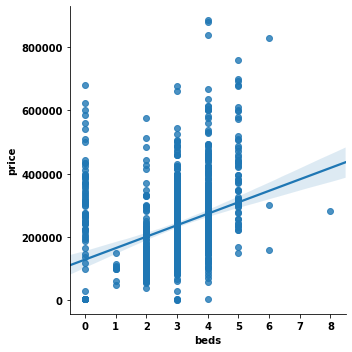

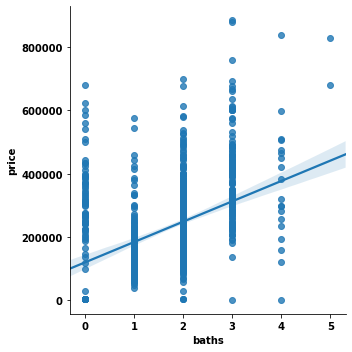

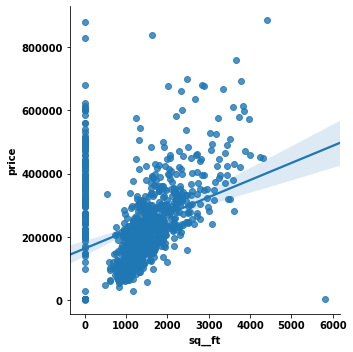

In [15]:
# We're going to assume the most desired attributes are beds, baths, and sq__ft #
sns.lmplot(data=housing, x='beds', y='price')
plt.show()
sns.lmplot(data=housing, x='baths', y='price')
plt.show()
sns.lmplot(data=housing, x='sq__ft', y='price')
plt.show()

Observing the previous cell, we can see that square footage is a better predictor than bedrooms or bathrooms (discrete vs continous). Additionally, if we dropped all the plots of land that are in the dataset (the entries with 0 square footage, bedrooms, and bathrooms) we would see a much stronger trend line in our plot. Let's continue by creating a function that will take in two lists (X and Y) and returns the slope and intercept coefficients that minimize the SSE.

In [16]:
# Note: the optimal slope is found when the correlation coefficient is multiplied by the
# standard deviation of y divided by standard deviation of x. The optimal intercept is found
# when the mean of x is multiplied by the optimal slope and subtracted from the mean of y.

def lin_reg(x, y):
    beta_1 = (scipy.stats.pearsonr(x,y)[0])*(np.std(y)/np.std(x))
    beta_0 = np.mean(y)-(beta_1*np.mean(x)) 
    
    print('Optimal Y-Intercept:', beta_0)
    print('Optimal slope:', beta_1)

In [17]:
x = housing['sq__ft'].values
y = housing['price'].values

lin_reg(x, y)

Optimal Y-Intercept: 162938.7375609862
Optimal slope: 54.15619752295772


Let's calculate the residuals.

In [18]:
y_pred = []

for x in housing['sq__ft']:
    y = (54.1562*x) + 162938.7376
    y_pred.append(y)

In [19]:
housing['pred'] = y_pred

housing['residuals'] = abs(housing['price'] - housing['pred'])

In [20]:
housing['residuals'].mean()

95953.50602378053

The mean of our residuals is aproximately $96,000. This is the amount, on average, that our prediction is off from the true value. Let's continue by plotting our predictions to help visualize our model.

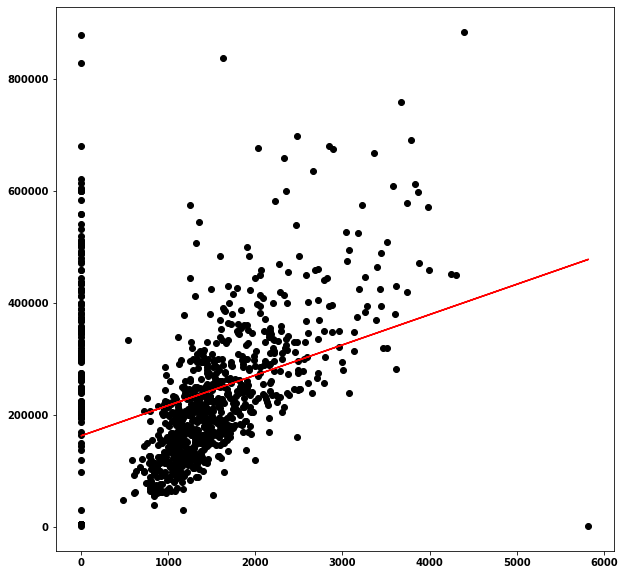

In [21]:
# Plot to help visualize our linear forecast #
fig = plt.figure(figsize=(10, 10))

plot = fig.add_subplot(111)

plot.tick_params(axis='both', which='major', labelsize=10)

ax = plt.gca()

ax.scatter(x=housing['sq__ft'], y=housing['price'], c='k');

ax.plot(housing['sq__ft'], housing['pred'], color='r');

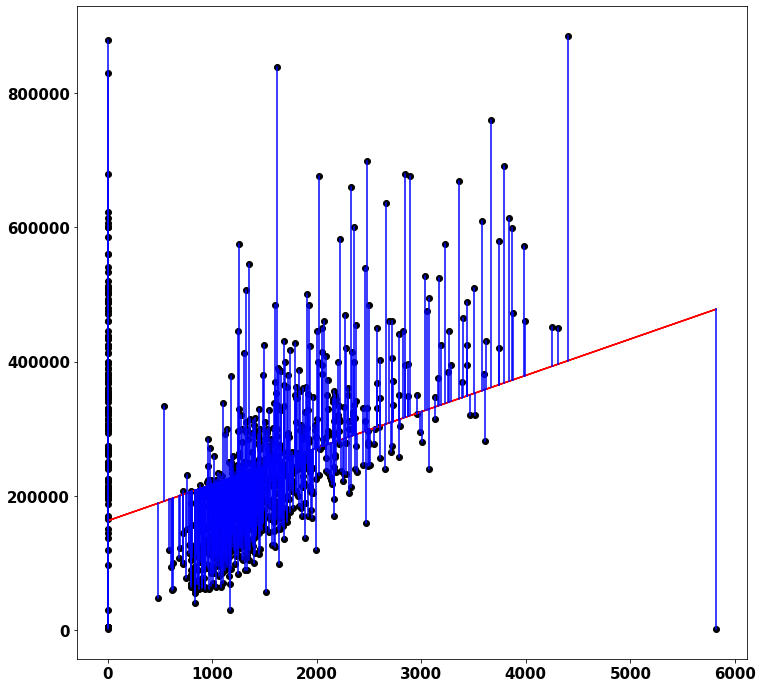

In [22]:
# Plot to help visualize our linear forecast with residuals #
fig = plt.figure(figsize=(12, 12))

plot = fig.add_subplot(111)

plot.tick_params(axis='both', which='major', labelsize=15)

ax = plt.gca()

ax.scatter(x=housing['sq__ft'], y=housing['price'], c='k')

ax.plot(housing['sq__ft'], housing['pred'], color='r');

for _, row in housing.iterrows():
    plt.plot((row['sq__ft'], row['sq__ft']), (row['price'], row['pred']), 'b-')

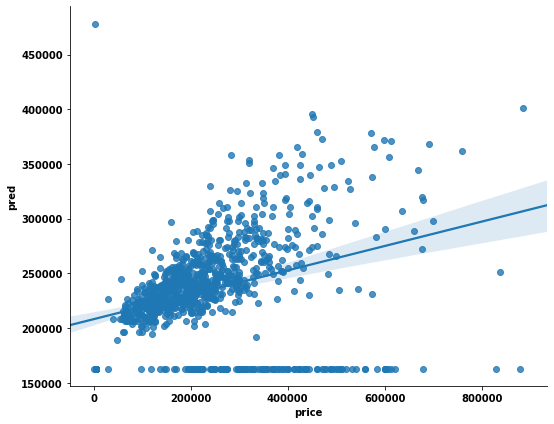

In [23]:
# Let's check out how our predictions compare to the true values visually #
sns.lmplot(data=housing, x='price', y='pred', height=6, aspect=1.3);